<a href="https://colab.research.google.com/github/redaelhail/Kaggle-competitions-and-notebooks/blob/main/Generating_spectrograms_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def spectrogram(xs):
  return signal.spectrogram(xs, 256, window=('hann'), nperseg=256, nfft=256, noverlap=200, mode='complex')

In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
def build_training_data(batch_size, sample_size):
  xs = np.random.randn(batch_size, sample_size)
  f, t, ys = spectrogram(xs)

  (num_rows, num_cols) = (ys.shape[1], ys.shape[2])
  print(ys.shape)

  ys = ys.reshape(batch_size, num_rows * num_cols)
  Ys = np.hstack([ys.real, ys.imag])
  return (xs, Ys, num_rows, num_cols)

In [ ]:
size = 2048
N = 15000

(xs, ys, rows, cols) = build_training_data(N, size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(rows * cols * 2, input_dim=size, use_bias=False)
])
model.summary()

optimizer = tf.keras.optimizers.Adam(amsgrad=True)
model.compile(loss='mean_squared_error', optimizer=optimizer)

(15000, 129, 33)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8514)              17436672  
                                                                 
Total params: 17,436,672
Trainable params: 17,436,672
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(xs,ys,epochs=20)

Epoch 1/20
469/469 [==============================] - 8s 12ms/step - loss: 0.0648
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 1.7890e-04
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 1.2354e-05
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 7.9347e-06
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 1.8282e-05
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 8.9775e-05
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 7.1829e-04
Epoch 8/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0068
Epoch 9/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0350
Epoch 10/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0577
Epoch 11/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0351
Epoch 12/20
469/469 [==============================] - 6s 12ms/step - lo

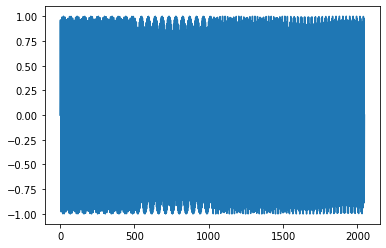

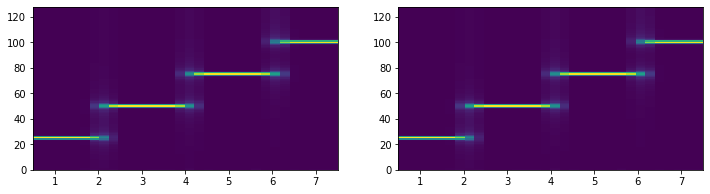

In [ ]:
def make_wave():
  # Create four evenly-spaced tones
  waves = []
  hz = 0
  for i in range(0, size, 512):
    hz = hz+50
    waves.append(np.sin(np.linspace(0, 2 * np.pi * hz, 512)))
  return np.hstack(waves)

wave = make_wave()
plt.plot(wave)
# Calculate spectrogram using math
f, t, wave_sxx = spectrogram(wave)
wave_sxx_graph = np.absolute(wave_sxx)

# Calculate spectrogram using neural network
nn_sxx = model.predict(np.reshape(wave, (1, size)))
nn_sxx_graph = np.reshape(np.absolute(nn_sxx[0][rows * cols:] + 1j * nn_sxx[0][:rows * cols]), (rows, cols))

# Plot spectrograms side-by-side
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.pcolormesh(t, f, wave_sxx_graph)
plt.subplot(1, 2, 2)
plt.pcolormesh(t, f, nn_sxx_graph)
plt.show()

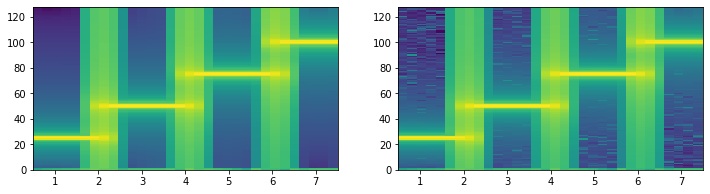

In [ ]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.pcolormesh(t, f, np.log(wave_sxx_graph))
plt.subplot(1, 2, 2)
plt.pcolormesh(t, f, np.log(nn_sxx_graph))
plt.show()

In [ ]:
model.fit(xs,ys,epochs=50)

Epoch 1/50
469/469 [==============================] - 6s 12ms/step - loss: 1.3973e-11
Epoch 2/50
469/469 [==============================] - 6s 12ms/step - loss: 1.1326e-12
Epoch 3/50
469/469 [==============================] - 6s 12ms/step - loss: 9.3533e-14
Epoch 4/50
469/469 [==============================] - 6s 12ms/step - loss: 9.0886e-15
Epoch 5/50
469/469 [==============================] - 6s 12ms/step - loss: 2.0978e-15
Epoch 6/50
469/469 [==============================] - 6s 12ms/step - loss: 1.5097e-15
Epoch 7/50
469/469 [==============================] - 6s 12ms/step - loss: 1.4507e-15
Epoch 8/50
469/469 [==============================] - 6s 12ms/step - loss: 1.4400e-15
Epoch 9/50
469/469 [==============================] - 6s 12ms/step - loss: 1.4384e-15
Epoch 10/50
469/469 [==============================] - 6s 12ms/step - loss: 1.4363e-15
Epoch 11/50
469/469 [==============================] - 6s 12ms/step - loss: 1.4339e-15
Epoch 12/50
469/469 [==============================]

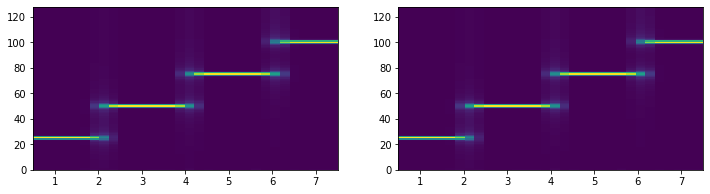

In [ ]:
# Calculate spectrogram using math
f, t, wave_sxx = spectrogram(wave)
wave_sxx_graph = np.absolute(wave_sxx)

# Calculate spectrogram using neural network
nn_sxx = model.predict(np.reshape(wave, (1, size)))
nn_sxx_graph = np.reshape(np.absolute(nn_sxx[0][rows * cols:] + 1j * nn_sxx[0][:rows * cols]), (rows, cols))

# Plot spectrograms side-by-side
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.pcolormesh(t, f, wave_sxx_graph)
plt.subplot(1, 2, 2)
plt.pcolormesh(t, f, nn_sxx_graph)
plt.show()

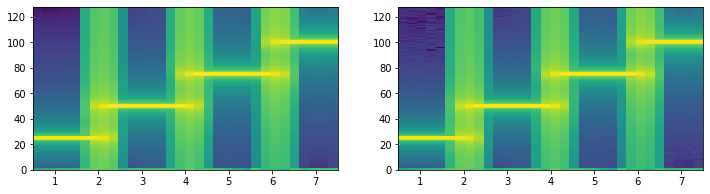

In [ ]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.pcolormesh(t, f, np.log(wave_sxx_graph))
plt.subplot(1, 2, 2)
plt.pcolormesh(t, f, np.log(nn_sxx_graph))
plt.show()